## Data 620 - Week 3 Assignment

### Team No. 6

- Yohannes Deboch
- Sherranette Tinapunan

### Graph Visualization

This week's assignment is to:

- Load a graph of your choosing from a text file or other source into a graph database or NetworkX.  If you take a large network dataset from the web (such as fromhttps://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
- Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
- Use a visualization tool of your choice ( NetworkX, Neo4j, Gephi, etc.) to display information.
- Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

### Data set
https://snap.stanford.edu/data/ego-Facebook.html

The name of this data set is <i>ego-Facebook</i>, which is an anonymized Facebook friends list. 

This data set is an undirected network of 4,039 nodes, and 88,234 edges.

Download: https://snap.stanford.edu/data/facebook_combined.txt.gz

### Load the libraries

In [46]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

### Read the Facebook data and create subset

The file has 88,234 rows (edge list). For this analysis, we are only going to be looking at 100 rows. These are rows 300 through 400. 

In [48]:
dt = pd.read_table("facebook_combined.txt", sep = " ", names = ['source','target'])
dt.shape

(88234, 2)

In [49]:
#dt = dt[(dt.source==0) | (dt.source==1) | (dt.source==2)]
dt = dt[300:400]
dt.shape

(100, 2)

In [50]:
dt.head()

,source,target
300,0,301
301,0,302
302,0,303
303,0,304
304,0,305


### Basic Graph Information

In [51]:
G = nx.from_pandas_edgelist(dt)

The graph has 348 nodes, 372 edges, and with an average degree of 2.1379

In [52]:
print( nx.info(G))

Name: 
Type: Graph
Number of nodes: 94
Number of edges: 100
Average degree:   2.1277


### Graph Diameter

A graph's diameter is the largest number of vertices that must be traversed in order to
travel from one vertex to another (pg. 36).

In this particular example, the graph diameter is 8.

In [53]:
nx.algorithms.diameter(G)

8

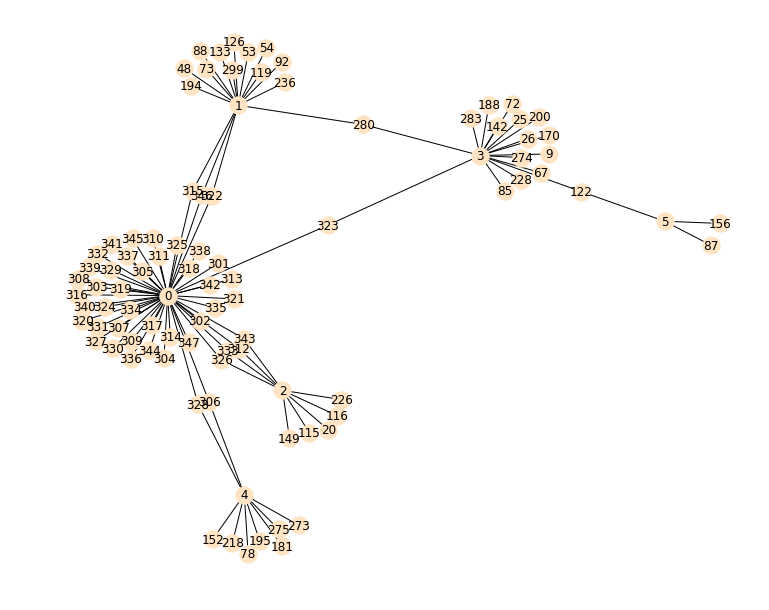

In [67]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
nx.draw(G, node_color='bisque', with_labels=True)

In [64]:
plt.savefig("facebook user network graph.png")

<Figure size 720x432 with 0 Axes>

### Graph Distance

The <b>Shortest path</b> (unweighted) is the number of edges that one must walk over from A to B. This is the simplest measure of distance (pg. 35). 

In this example, we are going to determine the shortest path between nodes 4 and 5. 

As you can see below, the <i>shortest_path</i> algorithm returns a list of nodes that starts from node 4 (source) and ends at node 5 (target). To go from node 4 to 5, there are 5 other nodes that one must cross to reach the target. The shortest path between node 4 and 5 has 6 edges. 

In [77]:
path = nx.shortest_path(G,source=4,target=5)
path

[4, 306, 0, 323, 3, 122, 5]

Source of code below that highlights the shortest path between 2 nodes:

https://stackoverflow.com/questions/24024411/highlighting-the-shortest-path-in-a-networkx-graph

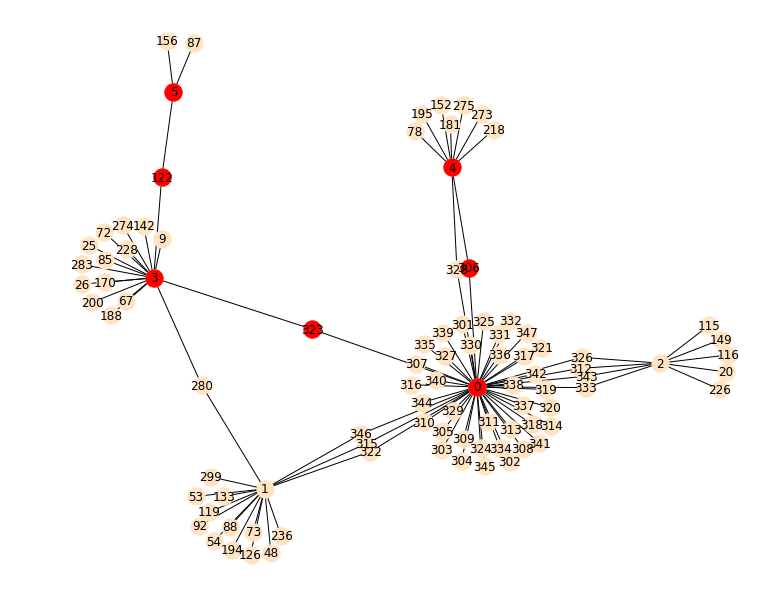

In [93]:
%matplotlib inline
pos = nx.spring_layout(G)
plt.rcParams['figure.figsize'] = (10, 8)
nx.draw(G, pos, node_color='bisque', with_labels=True)
# draw path in red
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='red')
plt.show()